# Exploratory Data Analysis: Spotify Tracks Dataset



## 1. Data Import & Initial Assessment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load dataset
df = pd.read_csv('/content/data.csv')

print(f"Dataset loaded: {df.shape[0]:,} observations × {df.shape[1]} features")
print(f"Memory footprint: {df.memory_usage(deep=True).sum()/1024**2:.1f} MB")

Dataset loaded: 156,752 observations × 19 features
Memory footprint: 64.3 MB


In [2]:
# Dataset overview
print("Dataset Structure:")
df.info()

print("\nSample Records:")
display(df.head())

print("\nData Types Summary:")
print(df.dtypes.value_counts().to_dict())

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156752 entries, 0 to 156751
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           156752 non-null  float64
 1   year              156752 non-null  int64  
 2   acousticness      156752 non-null  float64
 3   artists           156752 non-null  object 
 4   danceability      156752 non-null  float64
 5   duration_ms       156752 non-null  int64  
 6   energy            156752 non-null  float64
 7   explicit          156752 non-null  int64  
 8   id                156752 non-null  object 
 9   instrumentalness  156752 non-null  float64
 10  key               156752 non-null  int64  
 11  liveness          156752 non-null  float64
 12  loudness          156752 non-null  float64
 13  mode              156752 non-null  int64  
 14  name              156752 non-null  object 
 15  popularity        156751 non-null  float64
 16  r

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5.0,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5.0,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3.0,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665



Data Types Summary:
{dtype('float64'): 10, dtype('int64'): 5, dtype('O'): 4}


## 2. Data Quality Assessment

Data Quality Issues:


,Missing_Count,Missing_Percentage,Data_Type
popularity,1,0.0,float64
release_date,1,0.0,object
speechiness,1,0.0,float64
tempo,1,0.0,float64


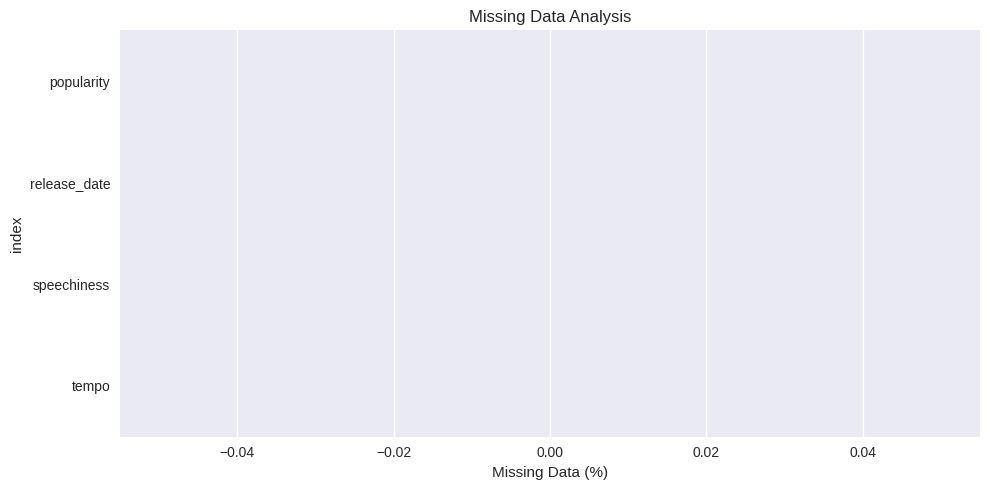

In [3]:
# Missing data analysis
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df) * 100).round(2)

quality_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct,
    'Data_Type': df.dtypes
})

# Filter and display problematic columns
issues = quality_summary[quality_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(issues) > 0:
    print("Data Quality Issues:")
    display(issues)

    # Visualization for missing data
    if len(issues) <= 10:
        plt.figure(figsize=(10, 5))
        sns.barplot(data=issues.reset_index(), y='index', x='Missing_Percentage', orient='h')
        plt.title('Missing Data Analysis')
        plt.xlabel('Missing Data (%)')
        plt.tight_layout()
        plt.show()
else:
    print("✅ Data quality check passed - no missing values detected")

In [8]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
valence                    float64
year                         int64
acousticness               float64
artists                     object
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                          object
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                        object
popularity                 float64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
dtype: object


## 3. Variable Classification & Summary Statistics

In [6]:
# Classify variables by type
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"Variable Classification:")
print(f"• Numeric: {len(numeric_cols)} variables")
print(f"• Categorical: {len(categorical_cols)} variables")
print(f"• DateTime: {len(datetime_cols)} variables")

# Summary statistics for numeric variables
if numeric_cols:
    print("\nDescriptive Statistics (Numeric Variables):")
    display(df[numeric_cols].describe().round(2))

Variable Classification:
• Numeric: 15 variables
• Categorical: 4 variables
• DateTime: 0 variables

Descriptive Statistics (Numeric Variables):


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,156752.00,156752.00,156752.00,156752.00,156752.00,156752.00,156752.00,156752.00,156752.00,156752.00,156752.00,156752.00,156751.00,156751.00,156751.00
mean,0.53,1976.02,0.51,0.54,230236.49,0.48,0.09,0.17,5.20,0.21,-11.51,0.71,31.56,0.10,116.75
std,0.26,26.22,0.38,0.18,124395.19,0.27,0.28,0.32,3.51,0.17,5.70,0.46,22.22,0.17,30.72
min,0.00,1921.00,0.00,0.00,5108.00,0.00,0.00,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00
25%,0.32,1954.00,0.10,0.42,169632.00,0.25,0.00,0.00,2.00,0.10,-14.68,0.00,10.00,0.04,93.29
50%,0.54,1977.00,0.53,0.55,206707.00,0.46,0.00,0.00,5.00,0.14,-10.63,1.00,34.00,0.05,114.63
75%,0.75,1998.00,0.90,0.67,261615.75,0.70,0.00,0.11,8.00,0.26,-7.21,1.00,49.00,0.08,135.40
max,1.00,2020.00,1.00,0.99,5403500.00,1.00,1.00,1.00,11.00,1.00,3.86,1.00,100.00,0.97,243.51


## 4. Univariate Analysis

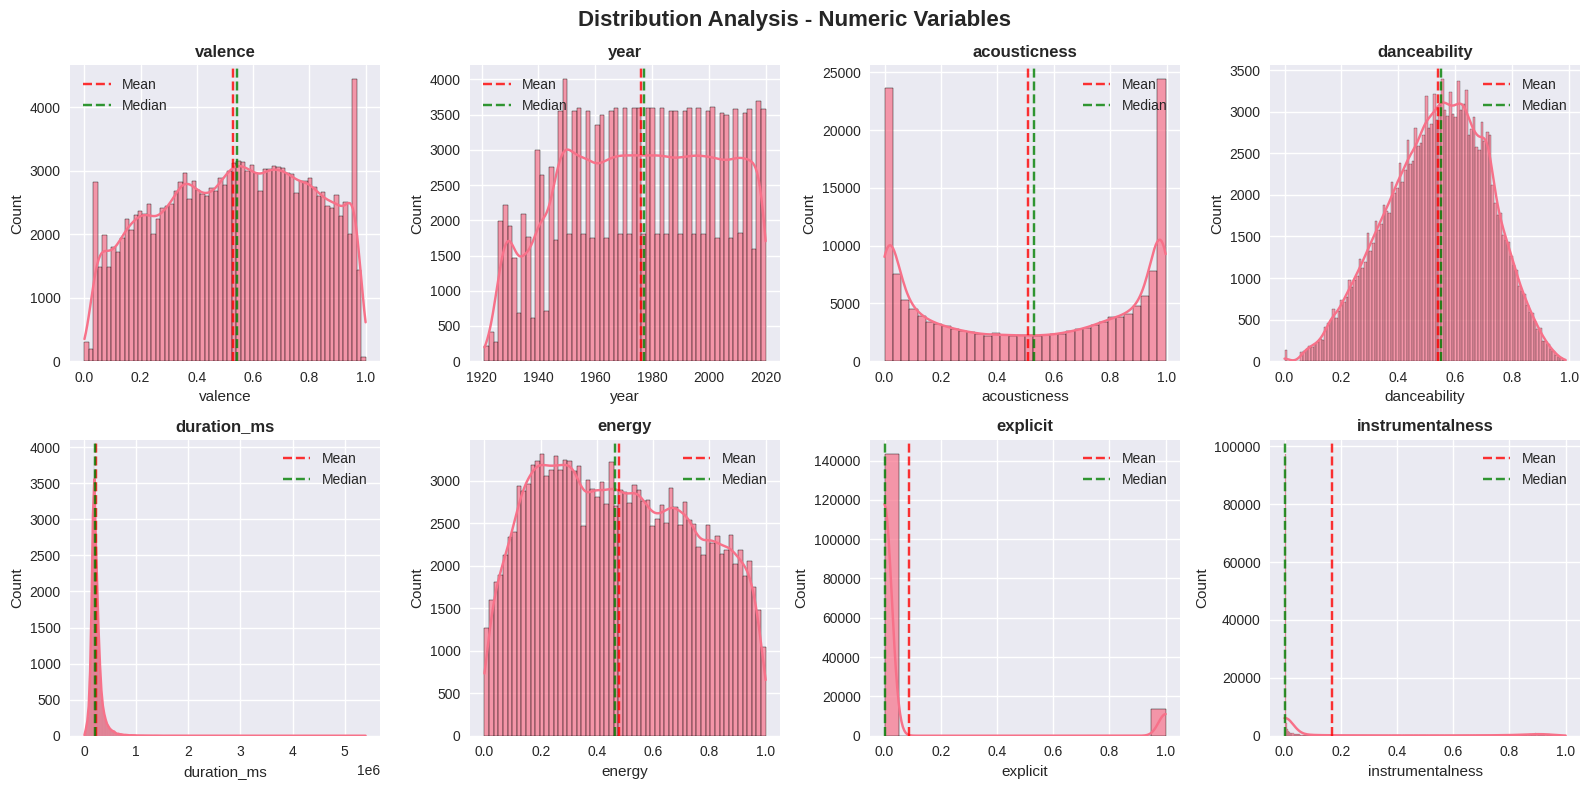

In [9]:
# Numeric variable distributions
if numeric_cols:
    n_cols = min(4, len(numeric_cols))
    n_rows = (len(numeric_cols[:8]) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if len(numeric_cols) == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols[:8]):
        sns.histplot(df[col], kde=True, ax=axes[i], alpha=0.7)
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', alpha=0.8, label='Mean')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', alpha=0.8, label='Median')
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].legend()

    # Hide unused subplots
    for i in range(len(numeric_cols[:8]), len(axes)):
        axes[i].axis('off')

    plt.suptitle('Distribution Analysis - Numeric Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

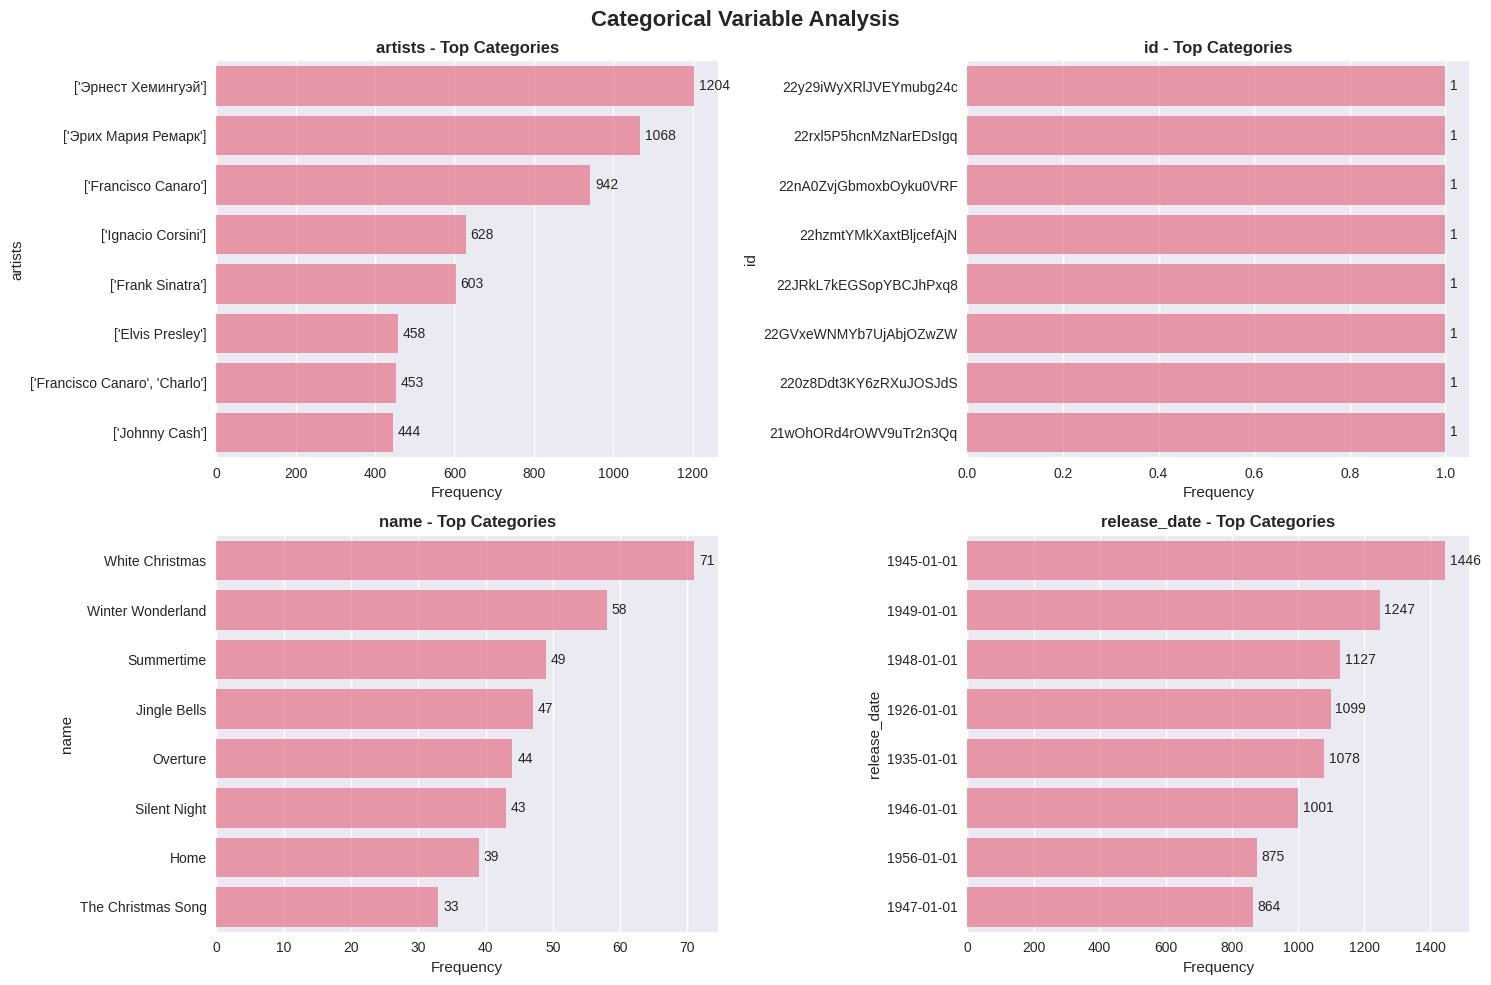

In [10]:
# Categorical variable analysis
if categorical_cols:
    n_vars = min(4, len(categorical_cols))
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols[:n_vars]):
        top_categories = df[col].value_counts().head(8)
        sns.barplot(y=top_categories.index, x=top_categories.values, ax=axes[i], alpha=0.8)
        axes[i].set_title(f'{col} - Top Categories', fontweight='bold')
        axes[i].set_xlabel('Frequency')

        # Add value labels
        for j, v in enumerate(top_categories.values):
            axes[i].text(v + max(top_categories.values)*0.01, j, str(v), va='center')

    # Hide unused subplots
    for i in range(n_vars, 4):
        axes[i].axis('off')

    plt.suptitle('Categorical Variable Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


Univariate Analysis - Categorical Variables:

Variable: artists
artists
['Эрнест Хемингуэй']                                                                                        1204
['Эрих Мария Ремарк']                                                                                       1068
['Francisco Canaro']                                                                                         942
['Ignacio Corsini']                                                                                          628
['Frank Sinatra']                                                                                            603
                                                                                                            ... 
['Aymara pan-pipe orchestra']                                                                                  1
['Παραδοσιακό']                                                                                                1
['Alabama Jr.Pettis']  

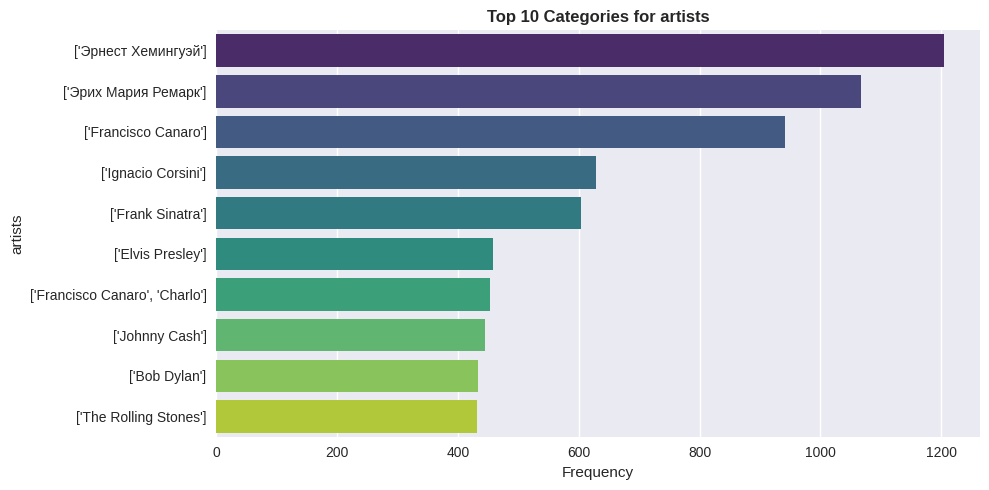


Variable: id
id
22y29iWyXRlJVEYmubg24c    1
22rxl5P5hcnMzNarEDsIgq    1
22nA0ZvjGbmoxbOyku0VRF    1
22hzmtYMkXaxtBljcefAjN    1
22JRkL7kEGSopYBCJhPxq8    1
                         ..
4d6HGyGT8e121BsdKmw9v6    1
3ftBPsC5vPBKxYSee08FDH    1
1o6I8BglA6ylDMrIELygv1    1
7xPhfUan2yNtyFG0cUWkt8    1
4BJqT0PrAfrxzMOxytFOIz    1
Name: count, Length: 156752, dtype: int64
------------------------------


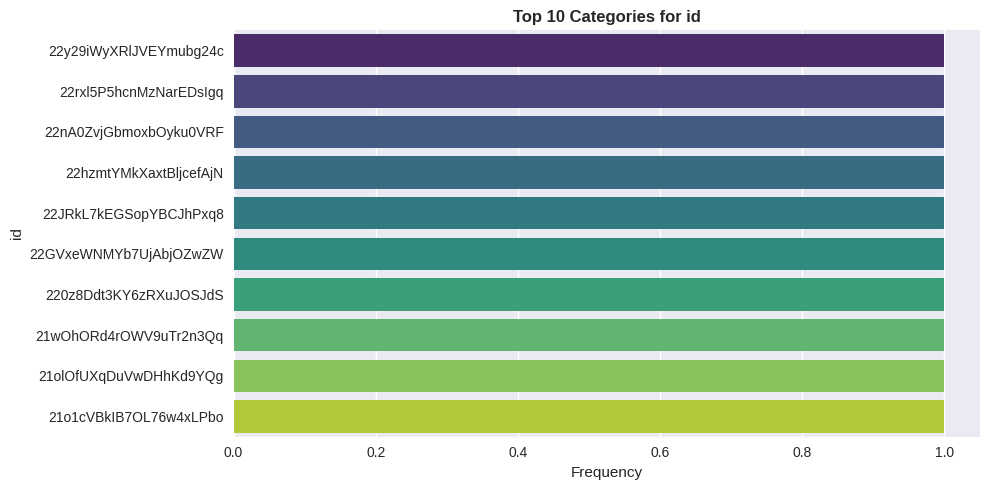


Variable: name
name
White Christmas                           71
Winter Wonderland                         58
Summertime                                49
Jingle Bells                              47
Overture                                  44
                                          ..
Часть 26.2 - За рекой, в тени деревьев     1
Power Is Power                             1
Ud Taksimi                                 1
La Vipère                                  1
Dans La Vie Faut Pas S'en Faire            1
Name: count, Length: 123718, dtype: int64
------------------------------


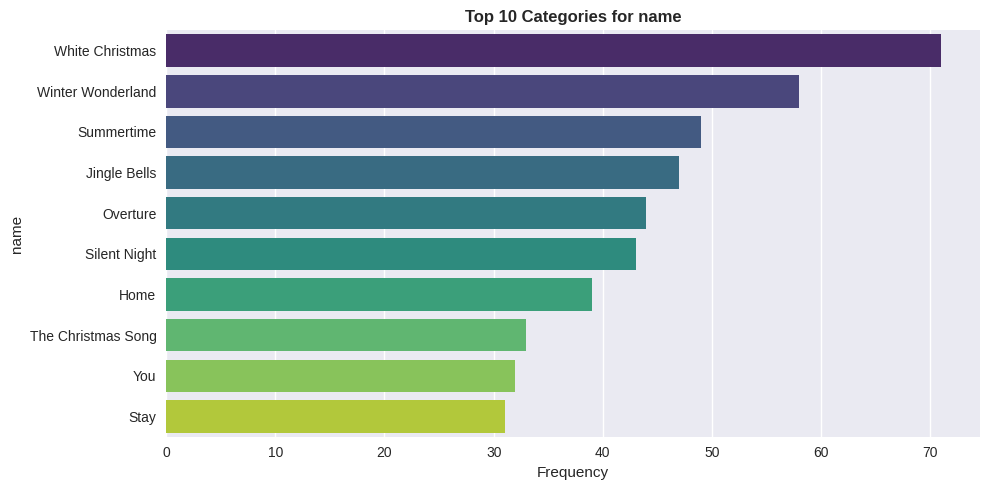

In [11]:
# Univariate analysis for categorical variables

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if categorical_cols:
    print("\nUnivariate Analysis - Categorical Variables:")
    for col in categorical_cols:
        print(f"\nVariable: {col}")
        print(df[col].value_counts())
        print("-" * 30)

        # Optional: Visualize top categories if there are many unique values
        if df[col].nunique() > 10:
            top_categories = df[col].value_counts().head(10)
            plt.figure(figsize=(10, 5))
            sns.barplot(y=top_categories.index, x=top_categories.values, orient='h', palette='viridis')
            plt.title(f'Top 10 Categories for {col}', fontweight='bold')
            plt.xlabel('Frequency')
            plt.tight_layout()
            plt.show()


Univariate Analysis - Release Date:


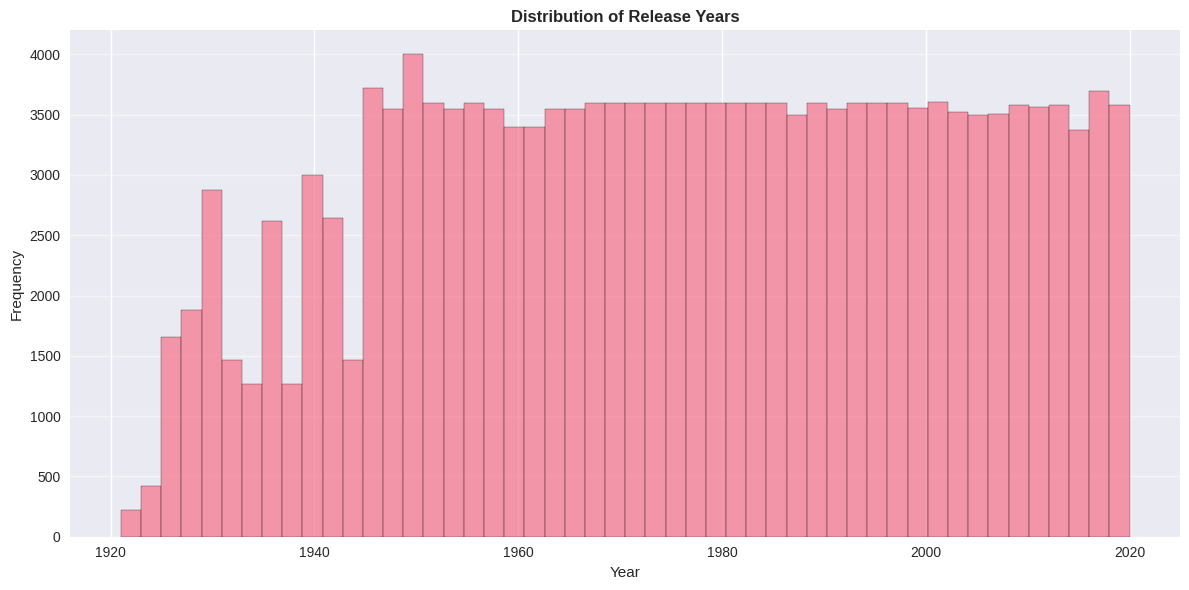

In [12]:
# Univariate analysis for release_date (datetime variable)

if 'release_date' in df.columns and df['release_date'].dtype == 'datetime64[ns]':
    print("\nUnivariate Analysis - Release Date:")

    # Plotting the distribution of release years
    plt.figure(figsize=(12, 6))
    df['year'].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Release Years', fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Optional: Analyze counts by decade or year if needed
    # df['release_decade'] = (df['year'] // 10) * 10
    # print("\nCounts by Decade:")
    # print(df['release_decade'].value_counts().sort_index())

else:
    print("\nRelease date column not found or not in datetime format.")

## 5. Multivariate Analysis

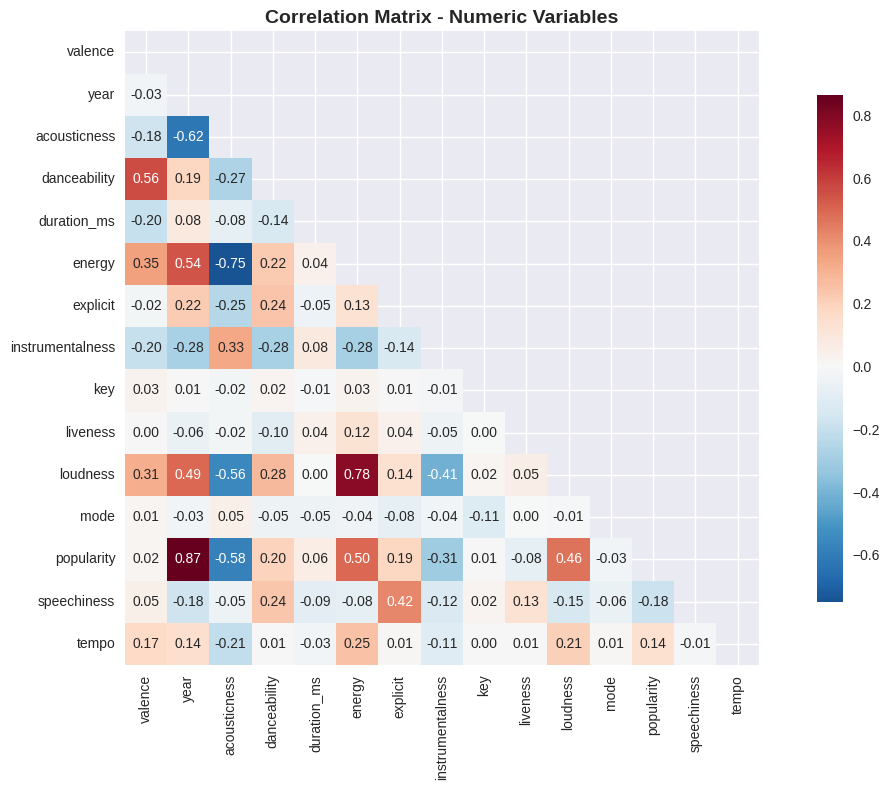

Strong Correlations (|r| > 0.7):
  • year ↔ popularity: 0.865
  • acousticness ↔ energy: -0.749
  • energy ↔ loudness: 0.783


In [13]:
# Correlation analysis for numeric variables
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()

    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r',
                center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix - Numeric Variables', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Identify strong correlations
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_correlations.append((correlation_matrix.columns[i],
                                          correlation_matrix.columns[j], corr_val))

    if strong_correlations:
        print("Strong Correlations (|r| > 0.7):")
        for var1, var2, corr in strong_correlations:
            print(f"  • {var1} ↔ {var2}: {corr:.3f}")
    else:
        print("No strong correlations (|r| > 0.7) detected.")

In [15]:
# Multivariate analysis: Relationship between popularity and artists

if 'popularity' in df.columns and 'artists' in df.columns:
    print("\nMultivariate Analysis - Popularity vs. Artists:")

    # Analyze average popularity by artist (top N artists)
    artist_popularity = df.groupby('artists')['popularity'].mean().sort_values(ascending=False)

    # Display top 10 most popular artists
    print("\nTop 10 Most Popular Artists (Average Popularity):")
    display(artist_popularity.head(10))

    # Display bottom 10 least popular artists
    print("\nBottom 10 Least Popular Artists (Average Popularity):")
    display(artist_popularity.tail(10))


else:
    print("\n'popularity' or 'artists' column not found for multivariate analysis.")


Multivariate Analysis - Popularity vs. Artists:

Top 10 Most Popular Artists (Average Popularity):


,popularity
artists,
"['Bad Bunny', 'Jhay Cortez']",100.0
"['24kGoldn', 'iann dior']",99.0
"['Cardi B', 'Megan Thee Stallion']",96.0
"['Pop Smoke', 'Lil Baby', 'DaBaby']",95.0
"['Justin Bieber', 'benny blanco']",95.0
"['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA', 'Farruko']",94.0
"['Joel Corry', 'MNEK']",94.0
['Ritt Momney'],93.0
"['Drake', 'Lil Durk']",93.0



Bottom 10 Least Popular Artists (Average Popularity):


,popularity
artists,
['Mixalis Kaleris'],0.0
['Mixalis Thomakos'],0.0
['Mixalis Xatzis'],0.0
"['Mixed Bokharian singers, doyra players']",0.0
"['Bob Haymes', 'Jimmy Carroll']",0.0
"['Joaquín Rodrigo', 'Ars Cantus - Voci Bianche, Coro e Orchestra Sinfonici', 'Andrea Ferrario']",0.0
"['Joaquín Rodrigo', 'Eugene Ormandy', 'Members of the Philadelphia Orchestra']",0.0
"['Joaquín Turina', 'Julio Martinez Oyanguren']",0.0
['Plazmatron'],0.0



Multivariate Analysis - Audio Features Over Time:


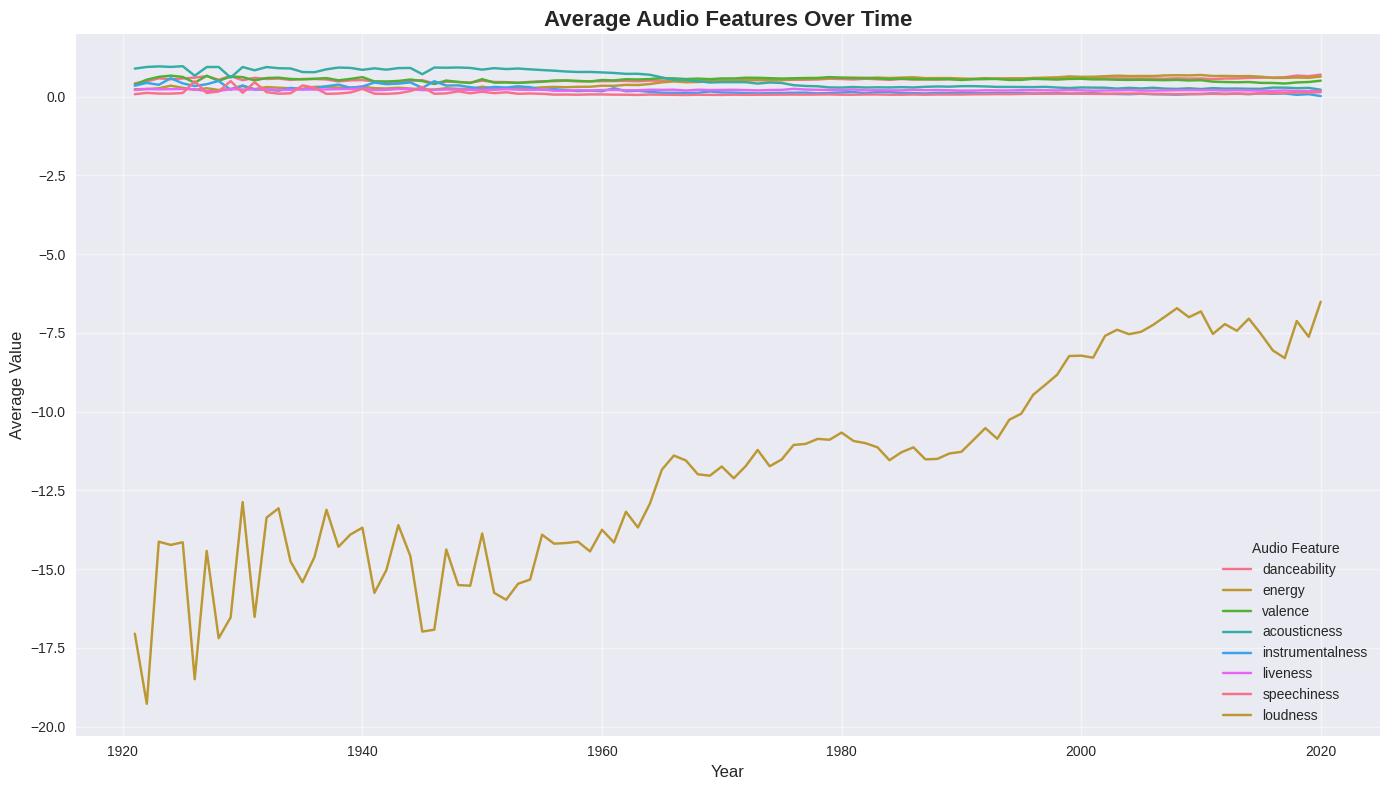

In [16]:
# Multivariate analysis: Relationship between audio features and year

print("\nMultivariate Analysis - Audio Features Over Time:")

# Select a few key audio features to visualize over time
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'loudness']

# Group by year and calculate the mean of selected audio features
features_over_time = df.groupby('year')[audio_features].mean()

# Plot the trends of audio features over time
plt.figure(figsize=(14, 8))
for feature in audio_features:
    plt.plot(features_over_time.index, features_over_time[feature], label=feature)

plt.title('Average Audio Features Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Audio Feature')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


Multivariate Analysis - Popularity vs. Audio Features (Scatter Plots):


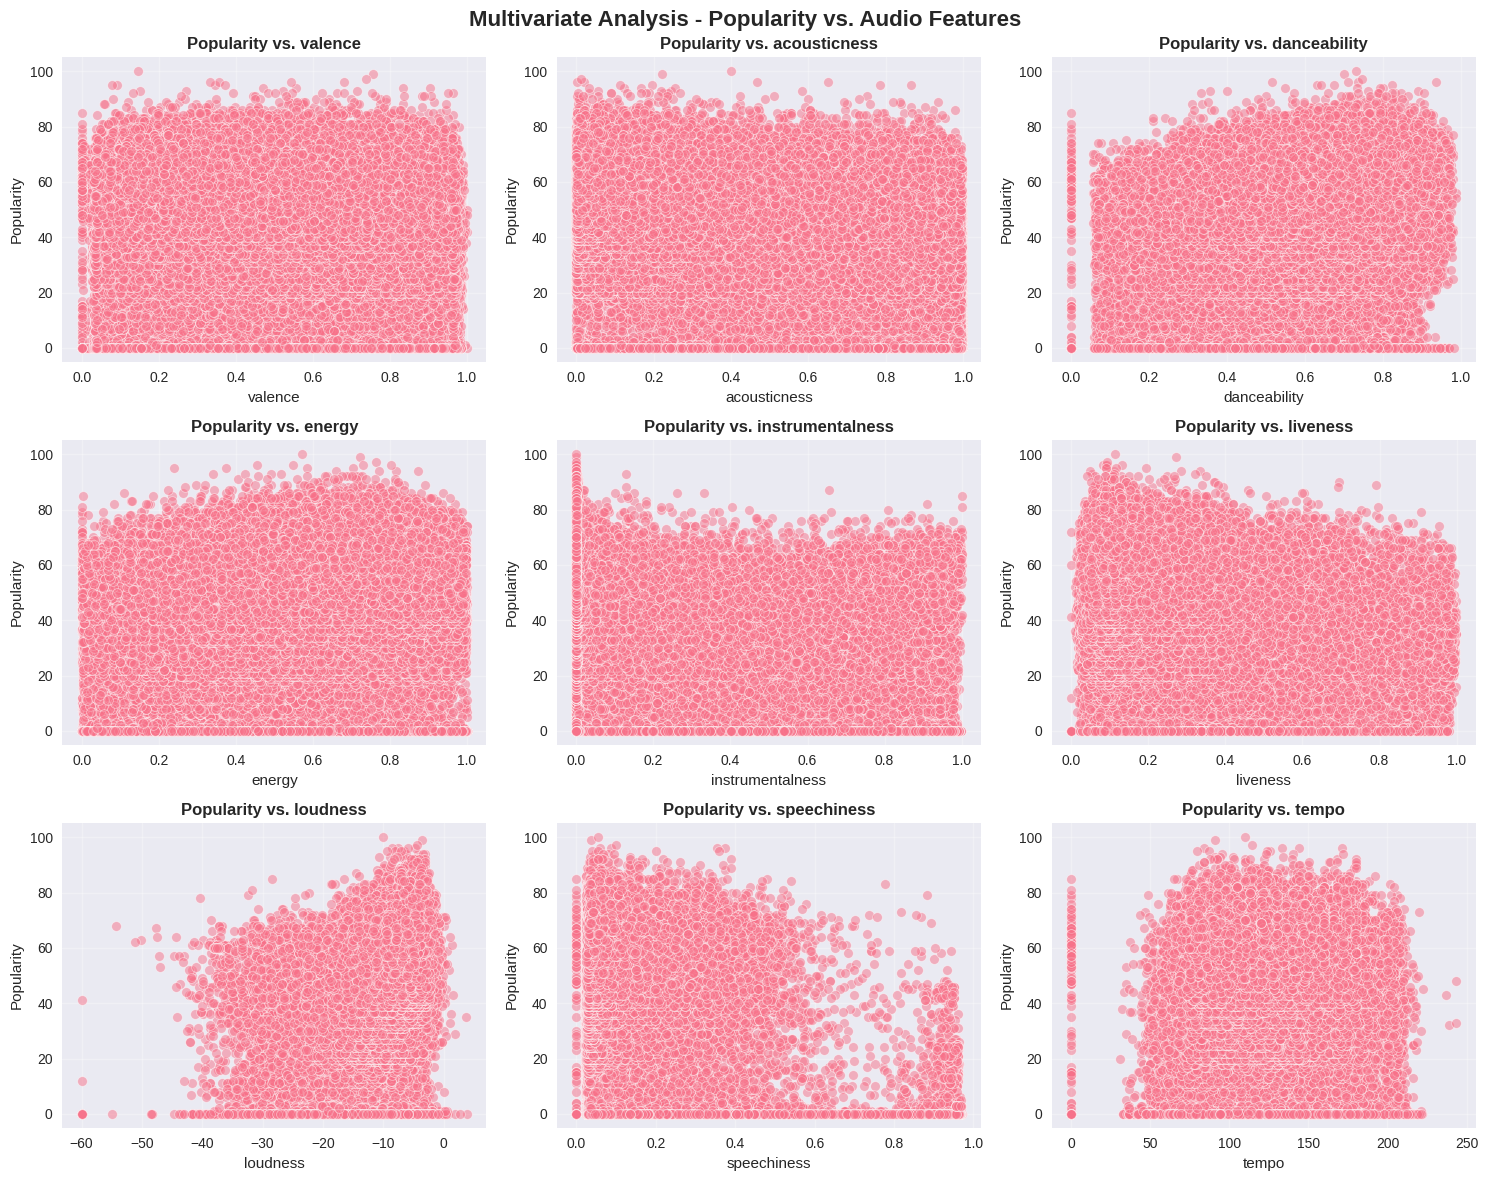

In [17]:
# Multivariate analysis: Relationship between popularity and audio features

if 'popularity' in df.columns and numeric_cols:
    print("\nMultivariate Analysis - Popularity vs. Audio Features (Scatter Plots):")

    # Select audio features (excluding 'year' and 'duration_ms' as they might skew plots or were covered)
    audio_features_for_scatter = ['valence', 'acousticness', 'danceability', 'energy',
                                  'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

    # Plot scatter plots for popularity vs selected audio features
    n_cols = 3
    n_rows = (len(audio_features_for_scatter) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(audio_features_for_scatter):
        if col in df.columns:
            sns.scatterplot(data=df, x=col, y='popularity', alpha=0.5, ax=axes[i])
            axes[i].set_title(f'Popularity vs. {col}', fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Popularity')
            axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(len(audio_features_for_scatter), len(axes)):
        axes[i].axis('off')

    plt.suptitle('Multivariate Analysis - Popularity vs. Audio Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

else:
    print("\n'popularity' column not found or no numeric columns available for multivariate analysis.")


Multivariate Analysis - Mode vs. Audio Features (Box Plots):


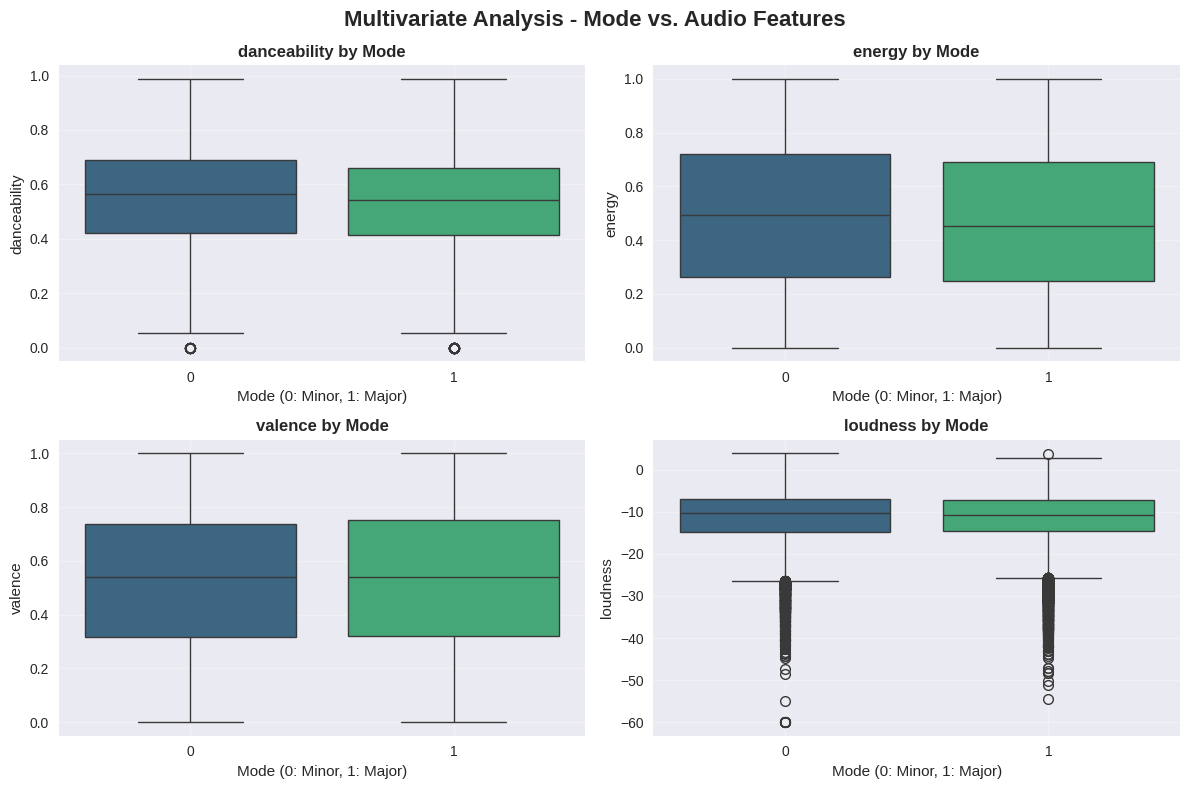

In [18]:
# Multivariate analysis: Relationship between mode and audio features

if 'mode' in df.columns and numeric_cols:
    print("\nMultivariate Analysis - Mode vs. Audio Features (Box Plots):")

    # Select a few key audio features to compare across modes
    audio_features_for_mode = ['danceability', 'energy', 'valence', 'loudness']

    # Plot box plots for selected audio features by mode
    n_cols = 2
    n_rows = (len(audio_features_for_mode) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(audio_features_for_mode):
        if col in df.columns:
            sns.boxplot(data=df, x='mode', y=col, ax=axes[i], palette='viridis')
            axes[i].set_title(f'{col} by Mode', fontweight='bold')
            axes[i].set_xlabel('Mode (0: Minor, 1: Major)')
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(len(audio_features_for_mode), len(axes)):
        axes[i].axis('off')

    plt.suptitle('Multivariate Analysis - Mode vs. Audio Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

else:
    print("\n'mode' column not found or no numeric columns available for multivariate analysis.")

## 6. Outlier Detection & Analysis

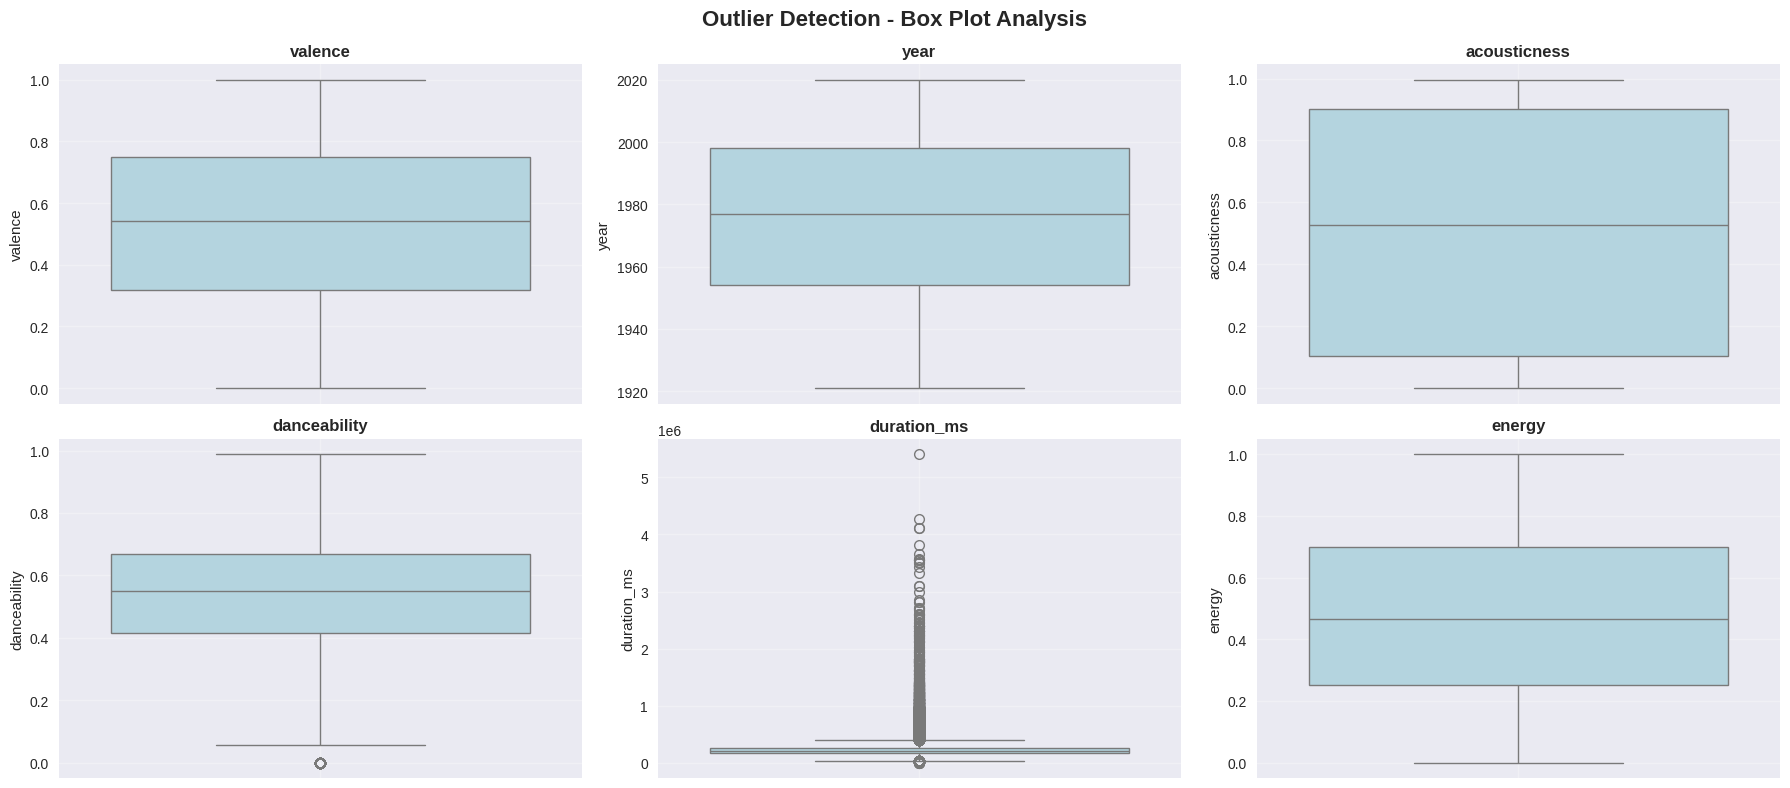

In [14]:
# Box plot analysis for outlier detection
if numeric_cols:
    n_vars = min(6, len(numeric_cols))
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols[:n_vars]):
        sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(n_vars, len(axes)):
        axes[i].axis('off')

    plt.suptitle('Outlier Detection - Box Plot Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [19]:
# Quantitative outlier analysis using IQR method
if numeric_cols:
    outlier_analysis = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)]
        outlier_count = len(outliers)
        outlier_percentage = round((outlier_count / len(df)) * 100, 2)

        outlier_analysis.append({
            'Variable': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_percentage,
            'Lower_Fence': round(lower_fence, 2),
            'Upper_Fence': round(upper_fence, 2)
        })

    outlier_summary = pd.DataFrame(outlier_analysis)
    outliers_detected = outlier_summary[outlier_summary['Outlier_Count'] > 0]

    if len(outliers_detected) > 0:
        print("Outlier Analysis Summary:")
        display(outliers_detected.sort_values('Outlier_Percentage', ascending=False))
    else:
        print("No significant outliers detected using IQR method.")

Outlier Analysis Summary:


,Variable,Outlier_Count,Outlier_Percentage,Lower_Fence,Upper_Fence
7,instrumentalness,33102,21.12,-0.16,0.27
13,speechiness,22099,14.10,-0.03,0.14
6,explicit,13391,8.54,0.00,0.00
9,liveness,10668,6.81,-0.14,0.50
4,duration_ms,8812,5.62,31656.38,399591.38
10,loudness,3107,1.98,-25.89,4.00
14,tempo,1513,0.97,30.11,198.57
3,danceability,133,0.08,0.04,1.05


## 7. Executive Summary & Recommendations

###  Summary of Findings

- The dataset contains information on over **156,000 Spotify tracks**, with **no duplicate rows** found.
- A small number of missing values were identified in the following columns:
  - `popularity`
  - `release_date`
  - `speechiness`
  - `tempo`  
  These represent a **very small percentage** of the total data and can be handled through imputation or removal depending on the analysis.
- Data types are generally consistent. The `release_date` column was successfully converted to **datetime format**, enabling time-series analysis.
- **Univariate analysis** revealed:
  - Distributions of audio features (e.g. `energy`, `acousticness`, `danceability`)
  - Most common artists and track names
  - A wide range of release years, with a **notable increase in more recent years**
- **Multivariate analysis** uncovered:
  - A **strong positive correlation** between `year` and `popularity`
  - **Negative correlation** between `acousticness` and `energy`
  - **Positive correlation** between `energy` and `loudness`
  - Large variation in **average popularity across artists**
  - Temporal trends: recent years show a **decrease in acousticness** and an **increase in energy and loudness**
  - **Scatter plots** show potential relationships between `popularity` and various audio features, though some are weak
  - **Box plots by `mode`** (major=1, minor=0) show differences in distributions for `danceability`, `energy`, `valence`, and `loudness`
- **Outlier detection** (IQR method) identified extreme values in:
  - `instrumentalness`
  - `speechiness`
  - `explicit`  
  These may require special handling depending on the analysis.

---

###  Recommendations

1. **Address Missing Values**  
   Consider imputing missing values in `popularity`, `release_date`, `speechiness`, and `tempo` using mean/median or dropping the affected rows if impact is negligible.

2. **Handle Outliers**  
   Outliers in `instrumentalness`, `speechiness`, and `explicit` may distort statistical analysis or modeling. Use transformations (e.g. log), capping, or removal where necessary.

3. **Explore Key Relationships**  
   Dive deeper into the **year–popularity** correlation. What factors drive popularity growth over time? Are they content- or platform-related?

4. **Artist-Level Analysis**  
   Identify what separates top artists from others. Compare audio features, release timing, and frequency to understand success drivers.

5. **Time-Series Analysis**  
   Use the cleaned `release_date` to explore **temporal changes** in audio characteristics and track popularity by month, year, or decade.

6. **Feature Engineering**  
   Add new variables like `decade`, `track_age`, or `is_top_artist` to enrich the dataset for modeling or trend analysis.

7. **Predictive Modeling**  
   Use the cleaned and engineered dataset to **predict `popularity`** or cluster songs by genre/style. Consider regression, classification, or unsupervised methods as next steps.
